# 사이언스 교육 스타트업 DS School:  광고 효율 정보와 구매 정보

## 데이터 로딩

In [13]:
import pandas as pd
import sqlite3
import numpy as np

In [2]:
pd.options.display.max_columns = 50

In [3]:
connect = sqlite3.connect('dsschool/dsschool.db')
connect

In [5]:
# users, surveys, payments 3개의 테이블이 존재
query = "SELECT * FROM 'sqlite_master'"

a = pd.read_sql(query,connect)
a

,type,name,tbl_name,rootpage,sql
0,table,users,users,50,"CREATE TABLE ""users"" (\n""user_id"" TEXT,\n ""mi..."
1,index,ix_users_user_id,users,51,"CREATE INDEX ""ix_users_user_id""ON ""users"" (""us..."
2,table,surveys,surveys,1691,"CREATE TABLE ""surveys"" (\n""survey_id"" TEXT,\n ..."
3,index,ix_surveys_survey_id,surveys,1692,"CREATE INDEX ""ix_surveys_survey_id""ON ""surveys..."
4,table,payments,payments,2,"CREATE TABLE ""payments"" (\n""payment_id"" TEXT,\..."


In [7]:
# survey 테이블 로드
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [ ]:
# user_id, question_id, created_at 순으로 정렬
surveys = surveys.sort_values(['user_id','question_id','created_at'])
surveys.head()

## 데이터 정리

### 1. surveys 테이블

In [8]:
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [ ]:
# answer~ 컬럼 값들을 bool형식로 변경
# created_at과 updated_at 컬럼을 datetime 형식으로 변환
# 한 고객이 여러번 설문에 응답한 경우를 제외

1-1 answer의 t 값과 f값을 True, False로 변환

In [10]:
for i in range(1,13):
    old_column =  f"answer{i}_selected"
    new_column = f"answer{i}_selected(bool)"
    surveys[new_column] = (surveys[old_column]=="t")

surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657,False,False,False,True,False,False,False,False,False,False,False,False
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947,False,False,True,True,False,False,False,False,False,False,False,False
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819,False,False,False,True,True,True,False,False,False,False,False,False
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461,False,False,False,True,True,True,False,False,False,False,False,False
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356,False,False,True,False,True,True,False,False,False,False,False,False


1-2 created_at과 updated_at을 datetime 자료형으로 변환

In [14]:
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

1-3 같은 유저가 다수 응답하는 경우 제거

In [15]:
surveys = surveys.drop_duplicates(['user_id','question_id'],keep='last')
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657,False,False,False,True,False,False,False,False,False,False,False,False
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947,False,False,True,True,False,False,False,False,False,False,False,False
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819,False,False,False,True,True,True,False,False,False,False,False,False
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461,False,False,False,True,True,True,False,False,False,False,False,False
5,rejlzsutqdav,0b3irtafnmtw,6,f,f,f,f,f,t,None,None,None,None,None,None,2018-01-22 06:38:54.334742,2018-01-22 06:38:54.334742,False,False,False,False,False,True,False,False,False,False,False,False


### 2. payments 테이블

In [16]:
# payments 데이터 로드
query = "SELECT * FROM 'payments'"

payments = pd.read_sql(query,connect)
print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


2-1 연락처 정보 정리

In [19]:
# 잘못된 정보는 Nan 값으로 변경
valid_phone_number = payments["연락처"].str.contains("010|\+82")

payments["연락처(clean)"] = payments["연락처"]

In [21]:
payments.loc[~valid_phone_number,"연락처(clean)"] = np.nan

print(payments.shape)

payments.loc[~valid_phone_number,["연락처","연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
176,asdasda,NaN
261,0thed0nonn,NaN
707,123131,NaN
708,16474540316,NaN
843,Mana,NaN


In [22]:
# 연락처를 ***-****-**** 형태로 통일
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

    if "-" in phone_number:
        return phone_number

    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

payments["연락처(clean)"] = payments["연락처(clean)"].apply(clean_phone_number)
print(payments.shape)
payments[["연락처","연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577


2-2 신청수업 컬럼 분리

In [23]:
# "입문반 22기" 등의 정보를 "입문반","22기"로 분리하여 다른 컬럼에 값을 저장
def find_course_type(course_name):
    return course_name.split()[0]

def find_course_id(course_name):
    return course_name.split()[1]

In [24]:
payments["수업타입"] = payments["신청수업"].apply(find_course_type)
payments["기수"]=payments["신청수업"].apply(find_course_id)

payments[["신청수업","수업타입","기수"]].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


2-3 상태에 대한 bool 형태 컬럼 생성

In [25]:
payments["상태(bool)"] = payments["상태"]

In [26]:
def status(value):
    if value == "결제 완료":
        return True
    else:
        return False

In [27]:
payments["상태(bool)"] = payments["상태(bool)"].apply(status)
payments[["상태","상태(bool)"]].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


2-4 신청날짜 컬럼 분리

In [28]:
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])

In [30]:
payments["신청날짜(연)"] = payments["신청날짜"].dt.year
payments["신청날짜(월)"] = payments["신청날짜"].dt.month
payments["신청날짜(일)"] = payments["신청날짜"].dt.day
payments["신청날짜(시)"] = payments["신청날짜"].dt.hour
payments["신청날짜(분)"] = payments["신청날짜"].dt.minute
payments["신청날짜(초)"] = payments["신청날짜"].dt.second
payments["신청날짜(요일)"] = payments["신청날짜"].dt.weekday_name

In [31]:
payments[["신청날짜","신청날짜(연)","신청날짜(월)","신청날짜(일)","신청날짜(시)","신청날짜(분)","신청날짜(초)","신청날짜(요일)",]].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday


## 데이터 분석

### 1. 요일별, 시간별 결제량 차이

In [32]:
# 금액 컬럼 값의 ","를 제거하고 정수형으로 변환
def clean_price(price):
    price = price.replace(",","")
    price = int(price)
    return price

In [33]:
payments["금액(int)"] = payments["금액"].apply(clean_price)

In [34]:
payments[["신청날짜","신청날짜(연)","신청날짜(월)","신청날짜(일)","신청날짜(시)","신청날짜(분)","신청날짜(초)","신청날짜(요일)","금액","금액(int)"]].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday,"594,000",594000


1-1 요일별 결제량 차이

In [39]:
week_table = payments.pivot_table(values="금액(int)",index="신청날짜(요일)", aggfunc=["sum","count"])
dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

week_table.loc[dayname]
#평일의 결제량이 주말에 비해 매우 높은 결과를 보임

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


1-2 시간별 결제량 차이

In [40]:
payments.pivot_table(values="금액(int)",index = "신청날짜(시)",aggfunc=["sum","count"])
# 낮시간대에서 12~1시 사이에 결제가 적고 직장인 퇴근 시간까지 결제량이 많음. 
# 평일 근무시간에 가장 결제가 많이 이루어진다고 판단할 수 있음

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


In [41]:
# 위 자료를 matplotlib으로 시각화
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib

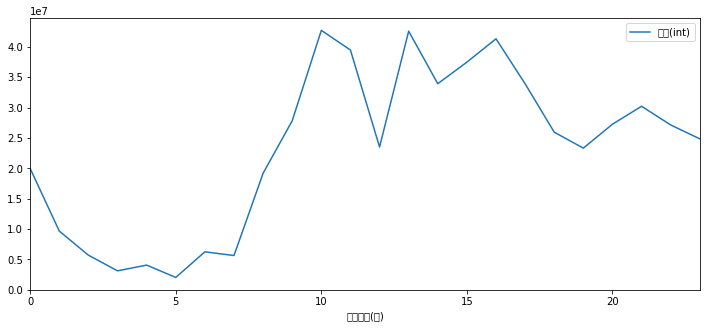

In [42]:
payments.pivot_table(values='금액(int)', index='신청날짜(시)', aggfunc='sum').plot(figsize=[12,5])

## 2. 설문조사 결과 도출

In [45]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

table = pd.pivot_table(surveys,index = 'question_id',values = answer_list,aggfunc = np.mean,dropna = False)

table = table[answer_list]
table

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.322277,0.093157,0.237711,0.074780,0.272075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.534155,0.241106,0.104858,0.119880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.372013,0.313656,0.211327,0.371414,0.244513,0.215522,0.141958,0.436962,0.102854,0.173271,0.356132,0.123305
4,0.072953,0.674481,0.252565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.098210,0.158664,0.394037,0.349090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.215998,0.252696,0.480677,0.453041,0.553250,0.430572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.750338,0.249662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# 1번 문항 데이터 사이언스를 배우고 싶은 이유는 무엇인가요?
# 3번 문항 데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)
# 두가지 질문을 통해 사용자의 니즈를 파악 후 향후 오픈할 강의의 우선순위를 정하고자 한다. 

2-1 데이터 병합

In [49]:
# payments, users, surveys 테이블을 병합
users = pd.read_sql("SELECT * FROM 'users'", connect)

In [53]:
data1 = payments.merge(users, left_on = '이메일', right_on='email', how='inner')

In [57]:
data = pd.merge(data1,surveys, on='user_id', how='inner')
data.head()

,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,t,None,None,None,None,None,None,None,None,None,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,None,None,None,None,None,None,None,None,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586,False,True,False,False,False,False,False,False,False,False,False,False


2-2 병합한 데이터 정리

In [63]:
# 필요한 컬럼 외 다른 컬럼 제거
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

In [64]:
data = data[selected_columns]
data.head(3)

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,3,False,False,False,True,True,False,False,False,False,False,True,False,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897
1,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156
2,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,2,False,False,False,True,False,False,False,False,False,False,False,False,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754


In [68]:
# 결제한 후 다시 설문조사를 한 사용자를 배제하기 위해 신청날짜가 created_at 보다 크거나 같은 경우만 남김.
data = data[data['신청날짜'] >= data['created_at']]

In [70]:
# 이 중, 이메일과 신청수업, question_id가 중복되는 경우, 첫 정보만 남김.

data = data.sort_values(by = ["이메일", "question_id", "created_at"])
data = data.drop_duplicates(['이메일', '신청수업', "question_id"], keep='last')
data.head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
892,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:19.286692,2018-01-17 06:31:19.286692
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
893,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


2-4 질문번호 1,3 번의 응답결과 정리

In [71]:
table_purchased = pd.pivot_table(data,index='question_id',values=answer_list,aggfunc='mean')
table_purchased = table_purchased[answer_list].loc[[1,3]]
table_purchased

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.275641,0.076923,0.217949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.384615,0.147436


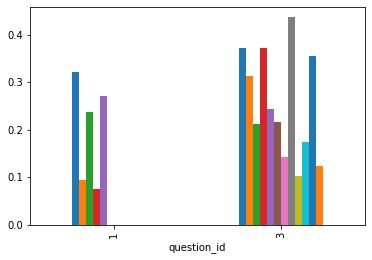

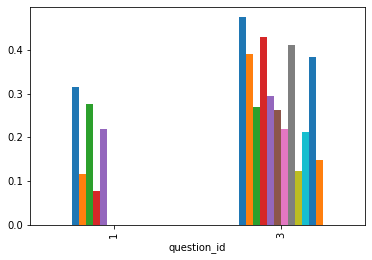

In [75]:
# 위의 데이터를 시각화
table.loc[[1,3]].plot(kind='bar', legend=False)

table_purchased.plot(kind='bar', legend=False)
# 첫 번째 그래프 : 전체 설문조사 결과 / 두 번째 그래프 : 수강신청한 고객들의 설문조사
# 1번 질문의 5번 응답 사용자들의 결제율이 낮음(% 5번 응답 : 최신 데이터사이언스 트렌드에 관심이 있어서)
# 3번 질문의 8번 응답 또한 수요에 비해 사용자들의 결제율이 낮음(% 8번 응답 : 마케팅 데이터를 분석하여 마케팅의 효율을 높이기)

## 3. 설문조사 후 결제까지의 시간

3-1 결제까지의 시간 도출

In [76]:
time = data['신청날짜'] - data['created_at']
time.head()

892   09:14:35.713308
889   09:14:12.718888
893   09:13:59.302001
887   09:13:55.157445
890   09:13:51.359780
dtype: timedelta64[ns]

In [78]:
# 그래프화를 위해 일 단위로 환산
time.dt.components.head(2)

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
892,0,9,14,35,713,308,0
889,0,9,14,12,718,888,0


In [79]:
time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)
time_int.head()

892    0.385127
889    0.384861
893    0.384711
887    0.384664
890    0.384618
dtype: float64

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'grid.linestyle': '--'})

(0, 25)

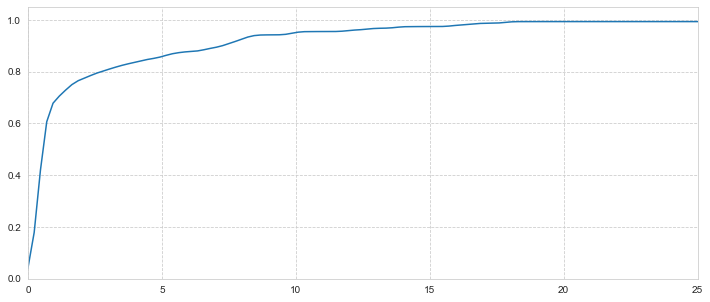

In [83]:
plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,hist=False,kde_kws={'cumulative' : True})

ax.set_xlim(0, 25)

# 80% 이상이 10일 이내 결제

## 4. 광고 캠페인 비교

4-1 mixpanel 데이터와 기존 데이터 병합

In [84]:
mixpanel_data = pd.read_csv('dsschool/mixpanel_people_profiles_revised.csv')

print(mixpanel_data.shape)
mixpanel_data.head()

(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [85]:
mixpanel_payments = (mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id'))    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4-2  캠페인별 유입 id의 수 대비 결제 비율이 높은 광고 캠페인

In [86]:
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

In [87]:
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

In [94]:
(pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False).head(10))

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
dripinsta7,0.066667
kang1,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


In [95]:
(pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean')
    .sort_values('상태(bool)', ascending=False).tail(10))

,상태(bool)
utm_campaign [first touch],
facebook_test1b_cheeseoms_vacation_home,0.0
11_6sigma,0.0
googleio,0.0
aj_ad,0.0
fc,0.0
andrewcho,0.0
fbcourse,0.0
fb2_cheese_audiencetest_w uni_b,0.0
faq5,0.0


In [96]:
# 하위 광고 캠페인과 상위 광고 캠페인의 차이가 극명함
# 따라서 유입 고객 수 20명 이상인 켐페인에 대해서만 분석 진행

In [97]:
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()

In [98]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [99]:
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

(pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean').sort_values('상태(bool)', ascending=False).head(10))

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390
